# Linear bouncing ∧ ball

In [109]:
def get_ball_y_trajectoryl(lowest_y, highest_y, last_frame_num):
    """
    Returns a sequence of y values of a linear bouncing movement.

    Args:
    - lowest_y: The y position of the initial position and the lower bound of the bouncing movement.
    - highest_y: The y position when the ball bounces off the upper bound and starts falling back down.
    - last_frame_num: The length of the movement.

    Returns:
    - A dictionary of y values at each frame: { 0: y, 1: y, ..., last_frame_num: y }
    """
    trajectory = {}
    apex_frame = int(last_frame_num / 2)
    for frame in range(last_frame_num+1):
        if frame <= apex_frame:
            t = frame / apex_frame
            y = lowest_y + (highest_y - lowest_y) * t
        else:
            t = (frame - apex_frame) / apex_frame
            y = highest_y - (highest_y - lowest_y) * t
        trajectory[frame] = y
    return trajectory


In [110]:
def get_ball_x_trajectoryl(start_x, end_x, last_frame_num):
    # Calculate the distance the ball needs to travel
    distance = end_x - start_x

    # Calculate the increment per frame
    increment = distance / last_frame_num

    # Create a dictionary to store the x position for each frame
    positions = {}
    for frame_num in range(last_frame_num + 1):
        # Calculate the x position for this frame
        x_position = start_x + increment * frame_num

        # Store the x position in the dictionary
        positions[frame_num] = x_position

    return positions


In [111]:
def merge_x_y_trajectories(x_trajectory, y_trajectory):
    merged = {}
    for i in range(len(x_trajectory)):
        merged[i] = [x_trajectory[i], y_trajectory[i]]
    return merged

In [112]:
import csv
import random

# Define the parameters for generating the trajectories
num_trajectories = 50
last_frame_num = 100

# Generate the trajectories
trajectoriesl = []
for i in range(num_trajectories):
    # Generate the x and y trajectories
    start_x = random.randint(20, 170)
    end_x = random.randint(450, 600)
    x_trajectory = get_ball_x_trajectoryl(start_x, end_x, last_frame_num)
    lowest_y = random.randint(10, 150)
    highest_y = random.randint(300, 450)
    y_trajectory = get_ball_y_trajectoryl(lowest_y, highest_y, last_frame_num)
    
    # Merge the x and y trajectories
    merged_trajectory = merge_x_y_trajectories(x_trajectory, y_trajectory)
    
    # Add the trajectory to the list of trajectories
    trajectoriesl.append(merged_trajectory)
#print(trajectoriesl)

# Write the trajectories to a CSV file
with open('l_bouncing.csv', 'w', newline='') as csvfile:
    fieldnames = ['frame', 'id', 'x', 'y']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    # Write the data rows
    for i, trajectory in enumerate(trajectoriesl):
        for frame, (x, y) in trajectory.items():
            writer.writerow({'frame': frame, 'id': i, 'x': x, 'y': y})




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


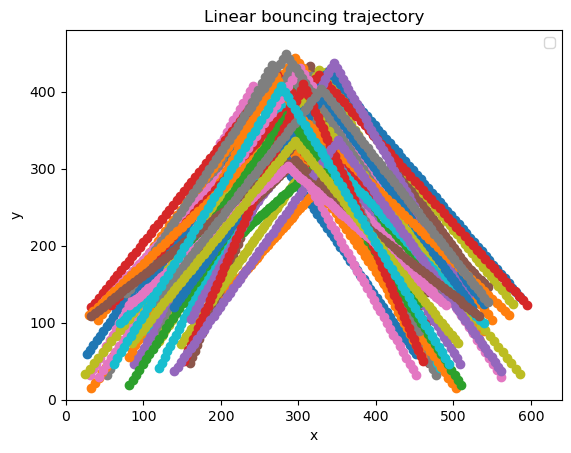

In [116]:
import matplotlib.pyplot as plt

for i, trajectory in enumerate(trajectoriesl):
    x = [frame[0] for frame in trajectory.values()]
    y = [frame[1] for frame in trajectory.values()]
    plt.scatter(x, y)
plt.title('Linear bouncing trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 640)
plt.ylim(0, 480)
plt.legend()
plt.show()

# Parabolic bouncing ∧ ball 

In [118]:
def get_ball_y_trajectoryp(lowest_y, highest_y, last_frame_num):
    """
    Returns a sequence of y values of a parabolic movement.

    Args:
    - lowest_y: The y position of the initial and final position.
    - highest_y: The y position when the ball has the highest position in the computer screen.
    - last_frame_num: The length of the movement.

    Returns:
    - A dictionary of y values at each frame: { 0: y, 1: y, ..., last_frame_num: y }
    """
    trajectory = {}
    for frame in range(last_frame_num+1):
        t = frame / float(last_frame_num)
        y = lowest_y + (highest_y - lowest_y) * (4 * t * (1 - t))  # parabolic equation
        trajectory[frame] = y
    return trajectory

In [119]:
def get_ball_x_trajectoryp(start_x, end_x, last_frame_num):
    # Calculate the distance the ball needs to travel
    distance = end_x - start_x

    # Calculate the increment per frame
    increment = distance / last_frame_num

    # Create a dictionary to store the x position for each frame
    positions = {}
    for frame_num in range(last_frame_num + 1):
        # Calculate the x position for this frame
        x_position = start_x + increment * frame_num

        # Store the x position in the dictionary
        positions[frame_num] = x_position

    return positions

In [120]:
import csv
import random

# Define the parameters for generating the trajectories
num_trajectories = 50
last_frame_num = 100

# Generate the trajectories
trajectoriesp = []
for i in range(num_trajectories):
    # Generate the x and y trajectories
    start_x = random.randint(20, 170)
    end_x = random.randint(450, 600)
    x_trajectory = get_ball_x_trajectoryp(start_x, end_x, last_frame_num)
    lowest_y = random.randint(10, 150)
    highest_y = random.randint(300, 450)
    y_trajectory = get_ball_y_trajectoryp(lowest_y, highest_y, last_frame_num)
    
    # Merge the x and y trajectories
    merged_trajectory = merge_x_y_trajectories(x_trajectory, y_trajectory)
    
    # Add the trajectory to the list of trajectories
    trajectoriesp.append(merged_trajectory)
#print(trajectoriesp)

# Write the trajectories to a CSV file
with open('p_bouncing.csv', 'w', newline='') as csvfile:
    fieldnames = ['frame', 'id', 'x', 'y']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    # Write the data rows
    for i, trajectory in enumerate(trajectoriesp):
        for frame, (x, y) in trajectory.items():
            writer.writerow({'frame': frame, 'id': i, 'x': x, 'y': y})




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


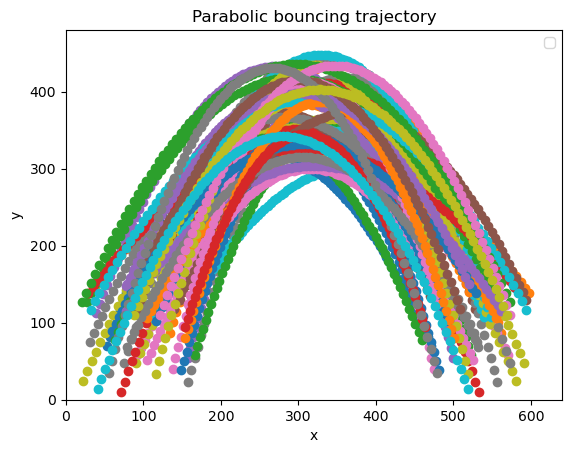

In [121]:
import matplotlib.pyplot as plt

for i, trajectory in enumerate(trajectoriesp):
    x = [frame[0] for frame in trajectory.values()]
    y = [frame[1] for frame in trajectory.values()]
    plt.scatter(x, y)
plt.title('Parabolic bouncing trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 640)
plt.ylim(0, 480)
plt.legend()
plt.show()

# 분류 기준

## 1. 연속된 점 사이의 평균 표준편차 : linear > parabolic

In [79]:
import csv
import math
import itertools

def classify_trajectory(filename):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        for id, group in itertools.groupby(reader, key=lambda row: row['id']):
            x = []
            y = []
            for row in group:
                x.append(float(row['x']))
                y.append(float(row['y']))
            # Calculate distances and angles
            distances = []
            angles = []
            for i in range(1, len(x)):
                dx = x[i] - x[i-1]
                dy = y[i] - y[i-1]
                distance = math.sqrt(dx*dx + dy*dy)
                angle = math.atan2(dy, dx)
                distances.append(distance)
                angles.append(angle)
            # Calculate differences between adjacent line segments
            differences = []
            for i in range(1, len(distances)):
                diff = abs(angles[i] - angles[i-1])
                if diff > math.pi:
                    diff = 2*math.pi - diff
                differences.append(diff)
            # Calculate standard deviation of differences
            stddev = math.sqrt(sum([diff*diff for diff in differences]) / len(differences))
            #print(stddev)
            # Classify trajectory
            if stddev < 0.1:
                print(f'Trajectory {id} is parabolic')
            else:
                print(f'Trajectory {id} is linear')
                
classify_trajectory('bouncing_merged.csv')

Trajectory 0 is linear
Trajectory 1 is linear
Trajectory 2 is linear
Trajectory 3 is linear
Trajectory 4 is linear
Trajectory 5 is linear
Trajectory 6 is linear
Trajectory 7 is linear
Trajectory 8 is linear
Trajectory 9 is linear
Trajectory 10 is linear
Trajectory 11 is linear
Trajectory 12 is linear
Trajectory 13 is linear
Trajectory 14 is linear
Trajectory 15 is linear
Trajectory 16 is linear
Trajectory 17 is linear
Trajectory 18 is linear
Trajectory 19 is linear
Trajectory 20 is linear
Trajectory 21 is linear
Trajectory 22 is linear
Trajectory 23 is linear
Trajectory 24 is linear
Trajectory 25 is linear
Trajectory 26 is linear
Trajectory 27 is linear
Trajectory 28 is linear
Trajectory 29 is linear
Trajectory 30 is linear
Trajectory 31 is linear
Trajectory 32 is linear
Trajectory 33 is linear
Trajectory 34 is linear
Trajectory 35 is linear
Trajectory 36 is linear
Trajectory 37 is linear
Trajectory 38 is linear
Trajectory 39 is linear
Trajectory 40 is linear
Trajectory 41 is linear
Tr

## 2. 이동 경로의 곡률 : Linear < Parabolic 
### 포물선 바운싱 운동에서는 공의 이동 경로가 포물선 형태이므로, 이동 경로의 곡률이 높은 경우 포물선 바운싱 운동으로 분류

In [100]:
import csv
import math

# Open the CSV file and read the trajectories
with open('bouncing_merged.csv') as f:
    reader = csv.DictReader(f)
    trajectories = {}
    for row in reader:
        frame = int(row['frame'])
        id = int(row['id'])
        x = float(row['x'])
        y = float(row['y'])
        if id not in trajectories:
            trajectories[id] = []
        trajectories[id].append((frame, x, y))

# Classify each trajectory as parabolic or linear
for id, trajectory in trajectories.items():
    # Extract x and y values
    x_trajectory = [p[1] for p in trajectory]
    y_trajectory = [p[2] for p in trajectory]

    # Calculate angles between adjacent points
    angles = []
    for i in range(1, len(x_trajectory)):
        dx = x_trajectory[i] - x_trajectory[i-1]
        dy = y_trajectory[i] - y_trajectory[i-1]
        angle = math.atan2(dy, dx)
        angles.append(angle)

    # Calculate differences between adjacent line segments
    differences = []
    for i in range(1, len(angles)):
        diff = angles[i] - angles[i-1]
        differences.append(diff)

    # Calculate curvature and classify trajectory
    curvature = sum(differences) / len(differences)
    #print(abs(round(curvature,4)))
    threshold = 0.024
    if abs(curvature) > threshold:
        print(f'Trajectory {id} is parabolic')
    else:
        print(f'Trajectory {id} is linear')


Trajectory 0 is linear
Trajectory 1 is linear
Trajectory 2 is linear
Trajectory 3 is linear
Trajectory 4 is linear
Trajectory 5 is linear
Trajectory 6 is linear
Trajectory 7 is linear
Trajectory 8 is linear
Trajectory 9 is linear
Trajectory 10 is linear
Trajectory 11 is linear
Trajectory 12 is linear
Trajectory 13 is linear
Trajectory 14 is linear
Trajectory 15 is linear
Trajectory 16 is linear
Trajectory 17 is linear
Trajectory 18 is linear
Trajectory 19 is linear
Trajectory 20 is linear
Trajectory 21 is linear
Trajectory 22 is linear
Trajectory 23 is linear
Trajectory 24 is linear
Trajectory 25 is linear
Trajectory 26 is linear
Trajectory 27 is linear
Trajectory 28 is linear
Trajectory 29 is linear
Trajectory 30 is linear
Trajectory 31 is linear
Trajectory 32 is linear
Trajectory 33 is linear
Trajectory 34 is linear
Trajectory 35 is linear
Trajectory 36 is linear
Trajectory 37 is linear
Trajectory 38 is linear
Trajectory 39 is linear
Trajectory 40 is linear
Trajectory 41 is linear
Tr

# SVM 모델링 

## 두개의 분류기준 (연속된 점 사이의 평균 표준편차, 곡률) 에 따라 각각 라벨링

In [99]:
import csv
import math

# Open the CSV file and read the trajectories
with open('bouncing_merged.csv') as f:
    reader = csv.DictReader(f)
    trajectories = {}
    for row in reader:
        frame = int(row['frame'])
        id = int(row['id'])
        x = float(row['x'])
        y = float(row['y'])
        if id not in trajectories:
            trajectories[id] = []
        trajectories[id].append((frame, x, y))

labels_c = []
curvature = [] # initialize the curvature list
labels_d = []
stddevs = []

# Classify each trajectory as parabolic or linear
for id, trajectory in trajectories.items():
    # Extract x and y values
    x_trajectory = [p[1] for p in trajectory]
    y_trajectory = [p[2] for p in trajectory]

    # Calculate angles between adjacent points
    angles = []
    for i in range(1, len(x_trajectory)):
        dx = x_trajectory[i] - x_trajectory[i-1]
        dy = y_trajectory[i] - y_trajectory[i-1]
        angle = math.atan2(dy, dx)
        angles.append(angle)

    # Calculate differences between adjacent line segments
    differences = []
    for i in range(1, len(angles)):
        diff = angles[i] - angles[i-1]
        differences.append(diff)

    # Calculate curvature and classify trajectory
    curv = sum(differences) / len(differences)
    #print(abs(round(curv,4)))
    curvature.append(curv)  # append curv to the curvature list
    
    threshold = 0.024
    if abs(curv) > threshold:
        label = 'P'
        #print(f'Trajectory {id} is parabolic')
    else:
        label = 'L'
        #print(f'Trajectory {id} is linear')
    
    labels_c.append(label)
    
    # Calculate distances and angles
    distances = []
    angles = []
    for i in range(1, len(x_trajectory)):
        dx = x_trajectory[i] - x_trajectory[i-1]
        dy = y_trajectory[i] - y_trajectory[i-1]
        distance = math.sqrt(dx*dx + dy*dy)
        angle = math.atan2(dy, dx)
        distances.append(distance)
        angles.append(angle) 

    # Calculate differences between adjacent line segments
    differences = []
    for i in range(1, len(distances)):
        diff = abs(angles[i] - angles[i-1])
        if diff > math.pi:
            diff = 2*math.pi - diff
        differences.append(diff)
    
    # Calculate standard deviation of differences
    stddev = math.sqrt(sum([diff*diff for diff in differences]) / len(differences))
    stddevs.append(stddev)
    #print(stddev)
    
    # Classify trajectory
    if stddev < 0.1:
        #print(f'Trajectory {id} is parabolic')
        label = 'P'
    else:
        #print(f'Trajectory {id} is linear')
        label = 'L'
    labels_d.append(label)  
    
    
#print(f'curvature : {curvature}')
#print(f'stddevs : {stddevs}')
print(f'label from curvature : {labels_c}')
print(f'label from standard deviation of differences : {labels_d}')


label from curvature : ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'P', 'L', 'L', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'L', 'P', 'P', 'L', 'P', 'P', 'P', 'P', 'L', 'P', 'L', 'P', 'L', 'L', 'L', 'P', 'P', 'P', 'P', 'L', 'L', 'L', 'P', 'P', 'P', 'L', 'P', 'P', 'P', 'L', 'L', 'P', 'P', 'P', 'P', 'L']
label from standard deviation of differences : ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'

## 두가지 라벨조합을 바탕으로 X(2 Features)와 y(Label) 생성

In [98]:
# Create feature vectors for each trajectory using curvature and standard deviation of differences values
feature = []
X = []
y = []

for id in trajectories.keys():
    feature = [curvature[id], stddevs[id]]
    X.append(feature)
    
for i in range(len(labels_c)):
    if labels_c[i] == 'L' and labels_d[i] == 'L':
        y.append('L') # linear bouncing
    else:
        y.append('P') # parabolic bouncing
        
#print(X)
print(y)


['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


## train, test data split

In [88]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Normalization

In [89]:
from sklearn.preprocessing import StandardScaler


normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (70, 2)
Test set dimension is (30, 2)


## SVM Fit

In [90]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

## 새로운 데이터로 예측해본 결과

In [91]:
# Test SVM classifier on new trajectories
new_X = [[0.1, 0.3], [0.4, 0.8], [0.05, 0.1]] # example feature vectors for new trajectories
predictions = clf.predict(new_X)
print(predictions) # predicted labels for new trajectories

['L' 'L' 'P']


## Performance score 

In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import recall_score, precision_score

# Train set에 대한 성능
y_pred = clf.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = clf.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}") 


Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:1.0000


In [76]:
recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ')

정확도:1.0000  |  민감도:1.0000  |  정밀도:1.0000


/Users/sim-yeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


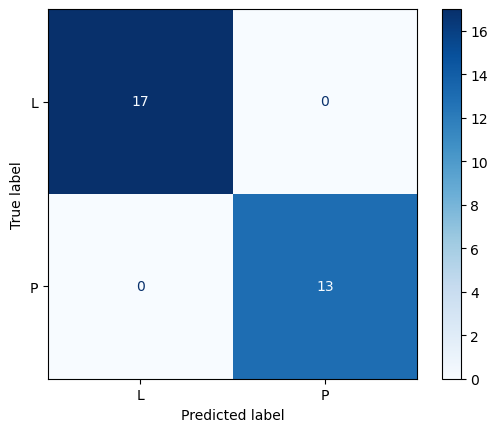

In [78]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show() 